<a href="https://colab.research.google.com/github/runnertyler/MA-Economics/blob/main/P1_P2_Mathews_Tyler_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I - Data Analysis: Triangular Arbitrage for Cryptocurrency

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import BTC-USD to Pandas dataframe from CSV file
btcusd = pd.read_csv("https://guoyuanxiong.github.io/teaching/BTC_USD_Bittrex_Historical_Data.csv")
btcusd.head()
btcusd.tail()

,Date,Price,Open,High,Low,Vol.,Change %
361,"Mar 14, 2018","8,189.0","9,130.0","9,332.0","7,937.5",5.99K,-10.57%
362,"Mar 13, 2018","9,156.9","9,150.4","9,448.0","8,850.0",3.65K,0.07%
363,"Mar 12, 2018","9,150.4","9,555.0","9,889.1","8,809.2",5.19K,-4.09%
364,"Mar 11, 2018","9,541.0","8,750.5","9,701.0","8,460.0",4.79K,9.03%
365,"Mar 10, 2018","8,750.5","9,240.0","9,532.0","8,700.5",4.41K,-5.30%


In [3]:
#import ETH-USD to Pandas dataframe from CSV file
ethusd = pd.read_csv('https://guoyuanxiong.github.io/teaching/ETH_USD_Bittrex_Historical_Data.csv')
ethusd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 10, 2019",135.27,137.37,137.50,134.28,1.51K,-1.53%
1,"Mar 09, 2019",137.37,133.52,138.43,133.17,1.65K,2.88%
2,"Mar 08, 2019",133.52,136.59,139.16,130.81,4.25K,-2.24%
3,"Mar 07, 2019",136.59,137.51,139.96,135.29,2.85K,-0.67%
4,"Mar 06, 2019",137.51,136.77,140.18,133.50,3.94K,0.54%


In [4]:
#import ETH-BTC to Pandas dataframe from CSV file
ethbtc = pd.read_csv('https://guoyuanxiong.github.io/teaching/ETH_BTC_Bittrex_Historical_Data.csv')
ethbtc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 10, 2019",0.034546,0.034857,0.034952,0.034388,6.04K,-0.90%
1,"Mar 09, 2019",0.034861,0.034472,0.035375,0.034467,4.99K,0.85%
2,"Mar 08, 2019",0.034568,0.035256,0.035405,0.034246,9.44K,-1.95%
3,"Mar 07, 2019",0.035256,0.035610,0.035846,0.035194,9.16K,-0.77%
4,"Mar 06, 2019",0.035531,0.035432,0.036069,0.034994,11.52K,0.09%


In [5]:
#Create new dataframe containing only date and BTC-USD price
df = btcusd[['Date','Price']].copy()
#Convert date column to datetime from string
df['Date'] = pd.to_datetime(df['Date'])
#Rename Price column to BTCUSD to clarify which price
df.rename(columns={'Price': 'BTCUSD'}, inplace=True)
#Remove commas from BTCUSD price column
df.replace(',','', regex=True, inplace=True)
c = df.select_dtypes(object).columns
df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [ ]:
#Add ETHUSD and ETHBTC columns to dataframe from respective dataframes
df['ETHUSD'] = ethusd.iloc[:,[1]].copy()
df['ETHBTC'] = ethbtc.iloc[:,[1]].copy()

In [ ]:
#Calculate the derived BTC price from ETHUSD and ETHBTC quotes
df['BTCUSD (ETH Deriv)'] = df['ETHUSD']/df['ETHBTC']
df.head(100)

,Date,BTCUSD,ETHUSD,ETHBTC,BTCUSD (ETH Deriv)
0,2019-03-10,3915.3,135.27,0.034546,3915.648700
1,2019-03-09,3943.6,137.37,0.034861,3940.506583
2,2019-03-08,3870.6,133.52,0.034568,3862.531821
3,2019-03-07,3880.5,136.59,0.035256,3874.234173
4,2019-03-06,3868.4,137.51,0.035531,3870.141567
...,...,...,...,...,...
95,2018-12-05,3755.5,102.61,0.027250,3765.504587
96,2018-12-04,3951.8,110.08,0.027758,3965.703581
97,2018-12-03,3886.4,108.80,0.027981,3888.352811
98,2018-12-02,4156.2,116.48,0.028075,4148.886910


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                366 non-null    datetime64[ns]
 1   BTCUSD              366 non-null    float64       
 2   ETHUSD              366 non-null    float64       
 3   ETHBTC              366 non-null    float64       
 4   BTCUSD (ETH Deriv)  366 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


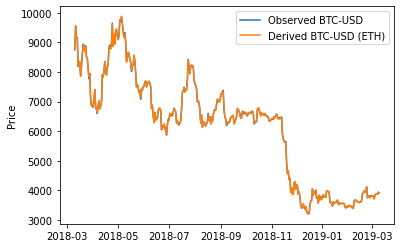

In [ ]:
#Plot observed and derived BTC timeseries 
plt.plot(df['Date'],df['BTCUSD'], label = "Observed BTC-USD")
plt.plot(df['Date'],df['BTCUSD (ETH Deriv)'], label = "Derived BTC-USD (ETH)")
plt.legend()
plt.ylabel('Price')

plt.show()

In [ ]:
df['Spread (ETH Deriv)'] = df['BTCUSD (ETH Deriv)'] - df['BTCUSD']
df

,Date,BTCUSD,ETHUSD,ETHBTC,BTCUSD (ETH Deriv),Spread (ETH Deriv)
0,2019-03-10,3915.3,135.27,0.034546,3915.648700,0.348700
1,2019-03-09,3943.6,137.37,0.034861,3940.506583,-3.093417
2,2019-03-08,3870.6,133.52,0.034568,3862.531821,-8.068179
3,2019-03-07,3880.5,136.59,0.035256,3874.234173,-6.265827
4,2019-03-06,3868.4,137.51,0.035531,3870.141567,1.741567
...,...,...,...,...,...,...
361,2018-03-14,8189.0,610.00,0.074346,8204.879886,15.879886
362,2018-03-13,9156.9,688.10,0.075410,9124.784511,-32.115489
363,2018-03-12,9150.4,695.70,0.076400,9106.020942,-44.379058
364,2018-03-11,9541.0,722.47,0.075559,9561.667042,20.667042


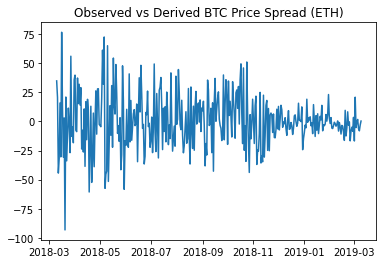

In [ ]:
plt.plot(df['Date'],df['Spread (ETH Deriv)'])

plt.title('Observed vs Derived BTC Price Spread (ETH)')
plt.show()

In [ ]:
print('Mean of BTC Spread (ETH Deriv): ' + str(np.mean(df['Spread (ETH Deriv)'])))
print('Standard Deviation of BTC Spread (ETH Deriv): ' + str(np.std(df['Spread (ETH Deriv)'])))

Mean of BTC Spread (ETH Deriv): 0.35711909087570454
Standard Deviation of BTC Spread (ETH Deriv): 22.66120242729311


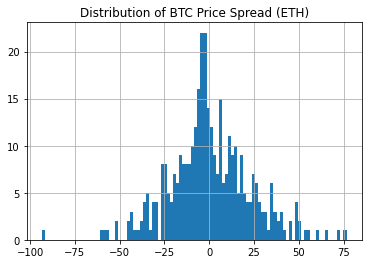

In [ ]:
plt.hist(df['Spread (ETH Deriv)'], bins=100)
plt.grid()
plt.title('Distribution of BTC Price Spread (ETH)')
plt.show()

In [ ]:
#import LTC-USD data
ltcusd = pd.read_csv('https://guoyuanxiong.github.io/teaching/LTC_USD_Bittrex_Historical_Data.csv')
ltcusd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 10, 2019",56.700,57.610,57.990,56.000,0.62K,-1.58%
1,"Mar 09, 2019",57.610,55.600,59.453,55.600,2.28K,3.62%
2,"Mar 08, 2019",55.600,56.790,57.505,54.550,3.48K,-2.10%
3,"Mar 07, 2019",56.790,55.614,59.000,54.005,5.85K,1.90%
4,"Mar 06, 2019",55.731,52.807,56.500,51.203,2.64K,5.54%


In [ ]:
#import LTC-BTC data
ltcbtc = pd.read_csv('https://guoyuanxiong.github.io/teaching/LTC_BTC_Bittrex_Historical_Data.csv')

In [ ]:
#add LTC-USD and LTC-BTC price data into existing dataframe
df['LTCUSD'] = ltcusd['Price']
df['LTCBTC'] = ltcbtc['Price']

In [ ]:
#Calculate derived BTC-USD using Litecoin price data
df['BTCUSD (LTC Deriv)'] = df['LTCUSD']/df['LTCBTC']
df

,Date,BTCUSD,ETHUSD,ETHBTC,BTCUSD (ETH Deriv),Spread (ETH Deriv),LTCUSD,LTCBTC,BTCUSD (LTC Deriv)
0,2019-03-10,3915.3,135.27,0.034546,3915.648700,0.348700,56.700,0.014436,3927.680798
1,2019-03-09,3943.6,137.37,0.034861,3940.506583,-3.093417,57.610,0.014640,3935.109290
2,2019-03-08,3870.6,133.52,0.034568,3862.531821,-8.068179,55.600,0.014424,3854.686633
3,2019-03-07,3880.5,136.59,0.035256,3874.234173,-6.265827,56.790,0.014613,3886.265654
4,2019-03-06,3868.4,137.51,0.035531,3870.141567,1.741567,55.731,0.014340,3886.401674
...,...,...,...,...,...,...,...,...,...
361,2018-03-14,8189.0,610.00,0.074346,8204.879886,15.879886,161.000,0.019480,8264.887064
362,2018-03-13,9156.9,688.10,0.075410,9124.784511,-32.115489,175.011,0.019190,9119.906201
363,2018-03-12,9150.4,695.70,0.076400,9106.020942,-44.379058,178.234,0.019527,9127.566959
364,2018-03-11,9541.0,722.47,0.075559,9561.667042,20.667042,189.907,0.019620,9679.255861


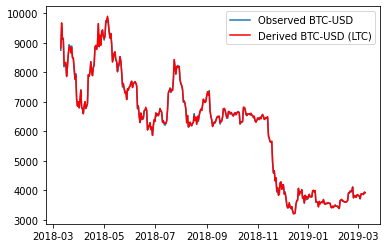

In [ ]:
#Plot the observed and derived BTC-USD prices using LTC data
plt.plot(df['Date'],df['BTCUSD'], label='Observed BTC-USD')
plt.plot(df['Date'],df['BTCUSD (LTC Deriv)'], label='Derived BTC-USD (LTC)', c='r')
plt.legend()
plt.show()

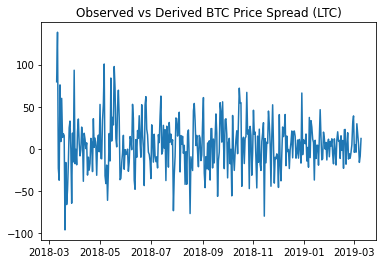

In [ ]:
#Calculate and plot spread between observed and derived BTC-USD using LTC data
df['Spread (LTC Deriv)'] =  df['BTCUSD (LTC Deriv)'] - df['BTCUSD']
plt.plot(df['Date'], df['Spread (LTC Deriv)'])
plt.title('Observed vs Derived BTC Price Spread (LTC)')
plt.show()

In [ ]:
print('Mean of BTC Spread (LTC Deriv): ' + str(np.mean(df['Spread (LTC Deriv)'])))
print('Standard Deviation of BTC Spread (ETH Deriv): ' + str(np.std(df['Spread (LTC Deriv)'])))

Mean of BTC Spread (LTC Deriv): 5.214729311040573
Standard Deviation of BTC Spread (ETH Deriv): 29.886150373338175


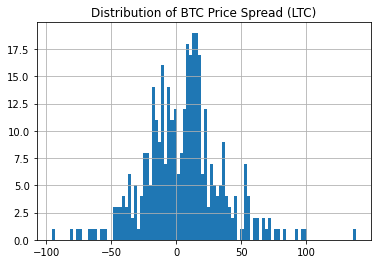

In [ ]:
plt.hist(df['Spread (LTC Deriv)'], bins=100)
plt.grid()
plt.title('Distribution of BTC Price Spread (LTC)')
plt.show()

# Part II - Logistic Modeling

In [ ]:
grad_df = pd.read_csv('https://guoyuanxiong.github.io/teaching/Graduate_School_Admission.csv')
grad_df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Based on this dataset, there are 400 rows and 4 columns. According to the means, approximately 32% are admitted, GRE average is 587, GPA is 3.39, and the average prestige ranking is about 2.5 (lower is better). 

In [ ]:
#import scikit-learn modules for logit and splitting data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [ ]:
#Create feature matrix and target vector
X_grad = grad_df.drop('admit',axis=1)
X_grad.shape

(400, 3)

In [ ]:
y_grad = grad_df['admit']
y_grad.shape

(400,)

In [ ]:
#split data in training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_grad, y_grad, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [ ]:
#define and fit model 
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Make predictions on train set using fitted model
predictions = logit.predict(X_train)

In [ ]:
#Determine score of model accuracy
acc_score = metrics.accuracy_score(y_train, predictions)

In [ ]:
#Precision score
precision = metrics.precision_score(y_train, predictions)

In [ ]:
#Recall score
recall = metrics.recall_score(y_train, predictions)

In [ ]:
#F1 score
f1 = metrics.f1_score(y_train, predictions)

In [ ]:
#Develop confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, predictions)
confusion_matrix

array([[203,  15],
       [ 78,  24]])

In [ ]:
print('Accuracy score: ' + str(accuracy_score))
print('Precision score: ' + str(precision))
print('Recall score: ' + str(recall))
print('F1 score: ' + str(f1))

Accuracy score: 0.709375
Precision score: 0.6153846153846154
Recall score: 0.23529411764705882
F1 score: 0.3404255319148936


Based on the above results, the logistic regression model does not have strong predictive performance. For each score calculated, a higher number closer to 1 would provide better results. Although the model is able to accurately predict about 7 in 10 admit/no-admits, this accuracy is largely found in the True Negative (Top left) quadrant of the confusion matrix. Given that only about 32% of applicants are admitted, the model could have achieved this accuracy simply by putting 100% of applicants into this quadrant. Since Precision, Recall, and F1 are also quite low, this suggests that the model has difficulty predicting True Positive cases, or students that should be admitted according to the admissions committee. 

In [ ]:
#make predictions on test set using fitted model
y_preds = logit.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_preds)
print('Accuracy score of test predictions: ' + str(test_accuracy))

Accuracy score of test predictions: 0.725
